In [35]:
import pandas as pd
import requests
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

# Getting coin Ids

In [2]:
url = 'https://api.coingecko.com/api/v3/coins/list?include_platform=false'
# no key required

parameters = {
    'include_platform': False
}

try:
  response = requests.get(url)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [3]:
ids = pd.DataFrame(response.json())

In [4]:
ids.head()

,id,symbol,name
0,01coin,zoc,01coin
1,0-5x-long-algorand-token,algohalf,0.5X Long Algorand Token
2,0-5x-long-altcoin-index-token,althalf,0.5X Long Altcoin Index Token
3,0-5x-long-balancer-token,balhalf,0.5X Long Balancer Token
4,0-5x-long-bitcoin-cash-token,bchhalf,0.5X Long Bitcoin Cash Token


In [57]:
print(ids[ids.name=='Bitcoin'])
print(ids[ids.name=='Ethereum'])
print(ids[ids.symbol=='bnb'])
print(ids[ids.symbol=='vet'])
print(ids[ids.symbol=='btt'])
print(ids[ids.symbol=='hot'])

          id symbol     name
846  bitcoin    btc  Bitcoin
            id symbol      name
2370  ethereum    eth  Ethereum
              id symbol          name
799  binancecoin    bnb  Binance Coin
           id symbol     name
6407  vechain    vet  VeChain
               id symbol        name
998  bittorrent-2    btt  BitTorrent
                  id symbol            name
3074       holotoken    hot            Holo
3099          hotnow    hot          HotNow
3141  hydro-protocol    hot  Hydro Protocol


# Getting Coin historical data

In CoinGecko API you can research:

- Coin historical data for a specific date with coins/id/history
- Historical data for one coin for several days with coins/id.market_chart

It is not possible to colect data for deveral coins at the same time

In [87]:
def get_db(coin: str, symbol: str) -> pd.DataFrame:
    """
    Transforms the API response in a dataframe with a date column
    
    Arguments:
    - coin: the name of the coin (lowercase) from the collected ids
    - symbol: coin symbol to use on the columns
    Outputs:
    - coin_df: Pandas DataFrame with historical data available and a data column
    """
    
    btc_url = 'https://api.coingecko.com/api/v3/coins/{}/market_chart?vs_currency=usd&days=max&interval=daily'.format(coin)
    
    parameters = {
        'id': coin,
        'vs_coin': 'usd',
        'days': 'max',
        'interval': 'daily'
    }

    try:
      response = requests.get(btc_url)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    coin_df = pd.DataFrame()
    counter = 0
    for key in list(response.json().keys()):
        if counter == 0:
            coin_df = pd.DataFrame(response.json()[key])
            coin_df.columns = ['timestamp', key]
        else:
            df = pd.DataFrame(response.json()[key])
            df.columns = ['timestamp', key]
            coin_df = coin_df.merge(df, on = 'timestamp', how = 'left')
        counter =+ 1
    coin_df['date'] = coin_df.timestamp.apply(lambda x: datetime.fromtimestamp(x/1000)).dt.date
    
    print(coin_df.total_volumes.isnull().sum())
    print(coin_df.prices.isnull().sum())
    
    coin_df.columns = ['timestamp', symbol + '_price', symbol + '_market_cap', symbol + '_volume', 'date']
    
    return coin_df


In [88]:
BTC = get_db('bitcoin', 'btc')

0
0


In [89]:
BTC.tail()

,timestamp,btc_price,btc_market_cap,btc_volume,date
2923,1619827200000,57828.511814,1.082722e+12,5.387905e+10,2021-05-01
2924,1619913600000,57812.969160,1.080898e+12,4.396707e+10,2021-05-02
2925,1620000000000,56600.745287,1.057850e+12,3.907266e+10,2021-05-03
2926,1620086400000,57200.300299,1.069571e+12,5.413247e+10,2021-05-04
2927,1620226112000,56379.300332,1.054319e+12,7.188970e+10,2021-05-05


In [90]:
BTC.shape

(2928, 5)

In [91]:
ETH = get_db('ethereum', 'eth')

0
0


In [92]:
ETH.tail()

,timestamp,eth_price,eth_market_cap,eth_volume,date
2093,1619827200000,2776.703712,3.211558e+11,3.547788e+10,2021-05-01
2094,1619913600000,2944.916947,3.407302e+11,3.672165e+10,2021-05-02
2095,1620000000000,2953.297348,3.419536e+11,3.572743e+10,2021-05-03
2096,1620086400000,3439.855070,3.982580e+11,6.419265e+10,2021-05-04
2097,1620226369000,3361.257971,3.875601e+11,6.907729e+10,2021-05-05


In [93]:
BNB = get_db('binancecoin', 'bnb')

0
0


In [94]:
BNB.tail()

,timestamp,bnb_price,bnb_market_cap,bnb_volume,date
1321,1619827200000,624.576535,9.632856e+10,7.224920e+09,2021-05-01
1322,1619913600000,619.030889,9.580771e+10,5.343009e+09,2021-05-02
1323,1620000000000,622.587767,9.615781e+10,4.766464e+09,2021-05-03
1324,1620086400000,675.098974,1.039651e+11,6.575775e+09,2021-05-04
1325,1620220352000,652.384264,1.005406e+11,5.452807e+09,2021-05-05


In [95]:
VET = get_db('vechain', 'vet')

0
0


In [108]:
VET.head()

,timestamp,vet_price,vet_market_cap,vet_volume,date
0,1532649600000,0.024916,1.317939e+09,9.689896e+07,2018-07-27
1,1532736000000,0.024978,1.321200e+09,4.303242e+07,2018-07-28
2,1532822400000,0.025667,1.357667e+09,1.792036e+07,2018-07-29
3,1532908800000,0.026372,1.394918e+09,2.354678e+07,2018-07-30
4,1532995200000,0.025333,1.339962e+09,2.743729e+07,2018-07-31


In [96]:
BTT = get_db('bittorrent-2', 'btt')

0
0


In [109]:
BTT.head()

,timestamp,btt_price,btt_market_cap,btt_volume,date
0,1548979200000,0.000495,0.0,1.857231e+08,2019-02-01
1,1549065600000,0.000473,0.0,3.358889e+07,2019-02-02
2,1549152000000,0.000433,0.0,1.673039e+07,2019-02-03
3,1549238400000,0.000601,0.0,9.556115e+07,2019-02-04
4,1549324800000,0.000863,0.0,3.604663e+08,2019-02-05


In [97]:
HOT = get_db('holotoken', 'hot')

0
0


In [110]:
HOT.head()

,timestamp,hot_price,hot_market_cap,hot_volume,date
0,1525046400000,0.000411,1.564198e+05,2.556226e+06,2018-04-30
1,1525132800000,0.000784,2.986889e+05,7.202907e+06,2018-05-01
2,1525219200000,0.000714,2.720069e+05,5.556289e+06,2018-05-02
3,1525305600000,0.000932,1.654271e+08,4.047131e+06,2018-05-03
4,1525392000000,0.001244,2.208279e+08,2.973560e+06,2018-05-04


In [103]:
final_df = (
    BTC[['date', 'btc_price', 'btc_volume', 'btc_market_cap']]
    .merge(ETH.drop('timestamp', axis=1), on='date', how='left')
    .merge(BNB.drop('timestamp', axis=1), on='date', how='left')
    .merge(VET.drop('timestamp', axis=1), on='date', how='left')
    .merge(BTT.drop('timestamp', axis=1), on='date', how='left')
    .merge(HOT.drop('timestamp', axis=1), on='date', how='left')
).fillna(0).set_index('date')

In [104]:
final_df.tail()

,btc_price,btc_volume,btc_market_cap,eth_price,eth_market_cap,eth_volume,bnb_price,bnb_market_cap,bnb_volume,vet_price,vet_market_cap,vet_volume,btt_price,btt_market_cap,btt_volume,hot_price,hot_market_cap,hot_volume
date,,,,,,,,,,,,,,,,,,
2021-05-01,57828.511814,5.387905e+10,1.082722e+12,2776.703712,3.211558e+11,3.547788e+10,624.576535,9.632856e+10,7.224920e+09,0.202759,1.321093e+10,2.091602e+09,0.007387,4.879316e+09,1.342079e+09,0.016122,2.863888e+09,3.467308e+08
2021-05-02,57812.969160,4.396707e+10,1.080898e+12,2944.916947,3.407302e+11,3.672165e+10,619.030889,9.580771e+10,5.343009e+09,0.206364,1.347972e+10,1.764292e+09,0.007396,4.874513e+09,1.351199e+09,0.016211,2.881472e+09,4.126239e+08
2021-05-03,56600.745287,3.907266e+10,1.057850e+12,2953.297348,3.419536e+11,3.572743e+10,622.587767,9.615781e+10,4.766464e+09,0.218802,1.420521e+10,3.061196e+09,0.007200,4.745823e+09,1.020262e+09,0.015586,2.764309e+09,3.006364e+08
2021-05-04,57200.300299,5.413247e+10,1.069571e+12,3439.855070,3.982580e+11,6.419265e+10,675.098974,1.039651e+11,6.575775e+09,0.212997,1.385133e+10,2.162001e+09,0.007129,4.700097e+09,1.225629e+09,0.015367,2.728189e+09,3.704947e+08
2021-05-05,56379.300332,7.188970e+10,1.054319e+12,3361.257971,3.875601e+11,6.907729e+10,652.384264,1.005406e+11,5.452807e+09,0.201711,1.310493e+10,2.492411e+09,0.007165,4.708041e+09,3.220699e+09,0.014714,2.589005e+09,5.874323e+08


# EDA

Market Cap is calculated by multiplying the number of existing coins by its value. It is expected to be highly correlated with the respective price as the coin number should be more or less constant, and therefore end up being redundant for our model. Let's calculate the correlation between variable:

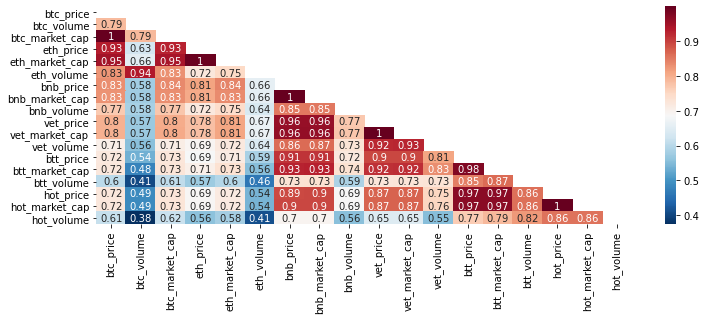

In [105]:
corr_matrix = final_df.corr()
lower_triangle_mask = np.triu(np.ones(corr_matrix.shape)).astype(np.bool)
cor_mat_lower = corr_matrix.mask(lower_triangle_mask)

plt.figure(figsize = (12,4))

sns.heatmap(cor_mat_lower,
            annot=True,
            cmap='RdBu_r')

plt.show()

As expected, market cap is redundant, it can be droped. We also see interesting correlation values for the prices of some coins which may bring good predicting power to our model.

In [106]:
final_df = final_df.drop(columns = ['btc_market_cap', 'eth_market_cap', 'bnb_market_cap', 'vet_market_cap', 'btt_market_cap', 'hot_market_cap'])

In [107]:
final_df.to_csv('../df_to_model.csv')